# K-Means Clustering:

In [9]:
import dataset_utils
import numpy as np
import matplotlib.pyplot as plt
import regex as re

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
from dataset_utils import get_random_songs
# len(labels[3])

In [10]:

def bench_k_means(estimator, name, data):
  estimator.fit(data)
  init = estimator.inertia_
  ari = metrics.adjusted_rand_score(labels, estimator.labels_)
  ami = metrics.adjusted_mutual_info_score(labels, estimator.labels_)
  fmi = metrics.fowlkes_mallows_score(labels, estimator.labels_)
  print(f"{name} \t {init} \t {ari} \t {ami} \t {fmi}")

In [11]:
pattern = re.compile(r"^pcds_3_22_unigram_CFXeps\d+.npy$")
files_path = r'E:\DATASET\note_events'
files = os.listdir(files_path)
matches = []

for file in files:
    match = pattern.findall(file)
    if(len(match)) > 0:
        matches.append(match[0])
print(len(matches))
y = np.load(os.path.join(dataset_utils.copy_base,'DATASET_bin_Y.npy'))
print(y.shape)
# matches = [os.path.join(files_path, 'pcds_3_22_unigram.npy')]

0
(614,)


In [17]:
x1 = np.load(os.path.join(files_path,'note_events_003.npy'))
x2 = np.load(os.path.join(files_path,'note_events_022.npy'))
x = np.append(x1, x2, axis=0)
matches = [x]
# X = np.load(os.path.join(files_path, x))

In [21]:
for x in matches:
    X = x#np.load(os.path.join(files_path, x))
    data = X
    n_samples, n_features = data.shape
    n_ragas = len(np.unique(y))
    labels = y
    sample_size = 300
    estim_1 = KMeans(init='k-means++', n_clusters=n_ragas, n_init=10)
    bench_k_means(estim_1, 'kmeans++', data)

    estim_2 = KMeans(init='random', n_clusters=n_ragas, n_init=10)
    bench_k_means(estim_2, 'random', data)

    pca = PCA(n_components=2).fit(data)
    pca_kmeans = KMeans(init=pca.components_, n_clusters=n_ragas, n_init=1)
    bench_k_means(pca_kmeans, 'PCA_based', data)

kmeans++ 	 1153842.7188768948 	 0.0012445927997235824 	 -0.0008137932342258765 	 0.6466841210376192
random 	 1153721.9197714902 	 -0.0001716188711075317 	 -0.0015742174566265484 	 0.6420222592321126
PCA_based 	 1176262.4390803918 	 0.00038189015589715816 	 0.0002721083174648498 	 0.7065972639895863


## Visualisation

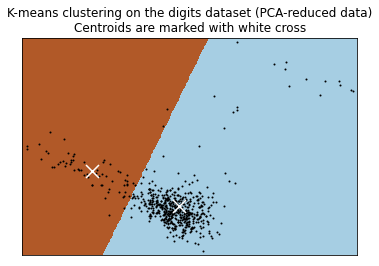

In [19]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_ragas, n_init=10)
kmeans.fit(reduced_data)
h = 0.2
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
import librosa

librosa.mela_to_degrees(20)

array([ 0,  2,  3,  5,  7,  8, 10])